# Hackathon Stat

This project illustrates the course LEPL1109 with an industrial application of statistics. You will analyse the capacity of solar production of electricity located in the French cities of Caen and Tours.
The file 'radiation.csv' contains 3 columns 
DATE           : YYYYMMDD,
Caen and Tours : the daily solar radiation in W/m2 measured in the 2 cities. 
Notice that data for some days are not reported due to failure of measurement system.

## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1: David Julien 30022100 / Canart Florentin 62872100

Part. 2: Canart Florentin 62872100 / Habets Norah 39802100

Part. 3: Squifflet Benjamin 34412100 / David Julien 30022100

Part. 4: /

---
## 1. Energy calculation and basic statistics

Compute the daily energy in WH per square meter of solar panel. For this purpose you use the datasets reporting the solar irradation measure in Caen and Tours (source https://www.ecad.eu/). The irradiation is measured in W/m2 per day. You will use the formula:

C = E_Sol x 24 x P_cr x f_perf

where  

C is the electricity produced in WH/m2 for a day

E_sol is the daily solar radiation in W/m2 

P_cr is the peak power coefficient, set here to  0.18 (monocristal silicium)

f_perf depends upon the system, set here to 0.75.

Remark:

1 W = 1 J/sec

1 WH  is 1W x 3600sec = 3600J

energy/m2 = E_sol * 24 * 3600 J/m2 = E_sol * 24 WH/m2

---
1.1. Start by computing the daily energy in WH produced by a 1m2 solar panel

a. Plot time-series of solar electric production in Caen and Tours from 1974 to 2023. Comment the evolution.

b. Plot boxplots of daily productions for both cities. Comment the box plot.

c. Remove outliers using the interquartile range. 

d. Plot an histogram of daily electricity production, after removal of outliers.

Watchout: remove all days for which a outlier is observed in Caen **or** Tours to keep the same number of observations.


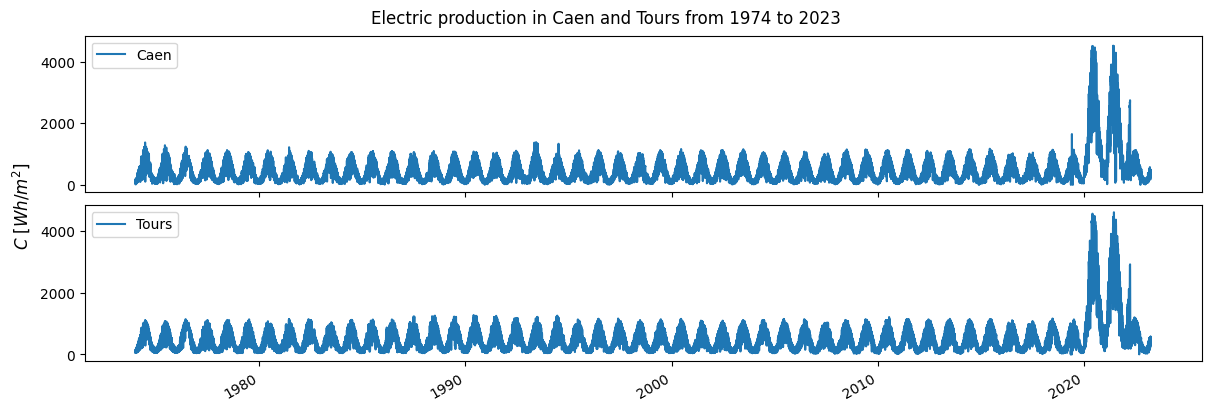

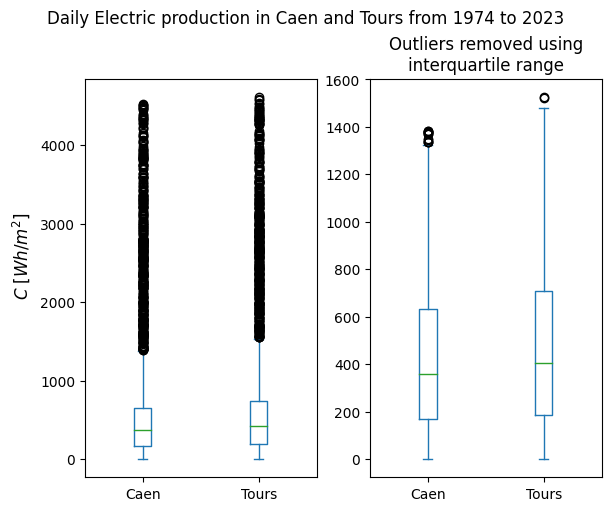

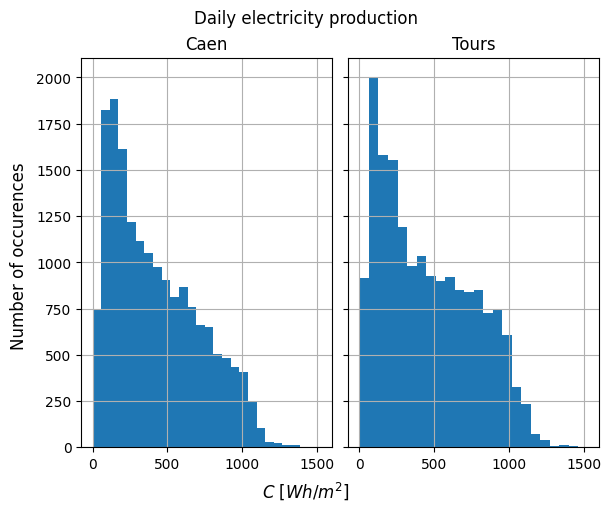

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *
from datetime import datetime
import matplotlib.dates as mdates

df = pd.read_csv("Radiation.csv")
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y%m%d")
df["Caen"] = df["Caen"]*24*0.18*0.75
df["Tours"] = df["Tours"]*24*0.18*0.75

fig, axs = plt.subplots(2, 1, layout='constrained', sharex=True, sharey=True, figsize=(12, 4))
fig.suptitle("Electric production in Caen and Tours from 1974 to 2023")
fig.supylabel("$C$ $[Wh/m^2]$")
plt.xticks(rotation=70)
df.plot(x="DATE", y="Caen", ax=axs[0])
df.plot(x="DATE", y="Tours", ax=axs[1])
axs[1].set_xlabel("")
plt.minorticks_off()

fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(6, 5))
fig.suptitle("Daily Electric production in Caen and Tours from 1974 to 2023")
fig.supylabel("$C$ $[Wh/m^2]$")
axs[1].set_title("Outliers removed using\ninterquartile range")
df[["Caen", "Tours"]].plot(kind="box", ax=axs[0])

caen_q1 = df["Caen"].quantile(0.25); caen_q3 = df["Caen"].quantile(0.75)
caen_iqr = (caen_q3 - caen_q1)*1.5
tours_q1 = df["Tours"].quantile(0.25); tours_q3 = df["Tours"].quantile(0.75)
tours_iqr = (tours_q3 - tours_q1)*1.5
outliers = df[
    (df["Caen"] < caen_q1 - caen_iqr) | (df["Caen"] > caen_q3 + caen_iqr) |
    (df["Tours"] < tours_q1 - tours_iqr) | (df["Tours"] > tours_q3 + tours_iqr)
]
df = df.drop(outliers.index)
df[["Caen", "Tours"]].plot(kind="box", ax=axs[1])

bins = int((df["Caen"].max() - df["Caen"].min())/(2*caen_iqr*len(df["Caen"])**(-1/3))) # The Freedman-Diaconis rule
fig, axs = plt.subplots(1, 2, layout='constrained', sharey=True,sharex=True , figsize=(6, 5))
df["Caen"].hist(bins=bins, ax=axs[0])
df["Tours"].hist(bins=bins, ax=axs[1])
fig.suptitle("Daily electricity production")
axs[0].set_title("Caen")
axs[1].set_title("Tours")
fig.supxlabel("$C$ $[Wh/m^2]$")
fig.supylabel("Number of occurences");


### Commentaire 1.1
#### Production d'électricité en fonction du temps
On remarque un accroissement très marqué de l'irradiation solaire à partir de 2020.
Certaines années sont plus irradiées que d'autres et l'irradiation varie beaucoup entre les mois d'hiver (octobre-mars) et les mois d'été (avril-septembre).

#### Boîtes à moustaches
Sur le diagramme en boîte de gauche, on remarque beaucoup de données aberrantes représentées par le nombre important de "fliers" au-dessus de la moustache supérieure. Ces données peuvent ensuite être supprimées grâce à la méthode IQR.
Le diagramme en boîte de droite représente alors la base de données débarrassée de ses données aberrantes.

---
1.2. We want to compute monthly statistics of electricity solar production. Calculate for each city and for each month: 

1) the average daily production of electricity in Wh/m2

2) the median daily production of electricity in Wh/m2

3) the standard deviation daily production of electricity in Wh/m2

4) the 5% percentile of daily production of electricity in Wh/m2

5) the 95% percentile of daily production of electricity in Wh/m2

Report the results in one or two tables. 

Compare and comment these statistics!

In [2]:
C_Caen_fix = array(df["Caen"])
C_Tours_fix = array(df["Tours"])
dates_fix = array(df["DATE"])

months = datetime64('nat', 'M')
months = dates_fix.astype(months)
month_numbers = months.astype('int') % 12 + 1
borne = len(month_numbers)

caen_canevas = []
tours_canevas = []
april_caen = []
april_tours = []

i = 0
while(i<borne):
    caen_month = []
    tours_month = []
    current_month = month_numbers[i]
    current_date = dates_fix[i]
    j = 0
    while(j+i<borne and month_numbers[j+i]==current_month):
        caen_month.append(C_Caen_fix[i+j])
        tours_month.append(C_Tours_fix[i+j])
        j += 1
    i = j+i

    if (current_month == 4):
        april_caen += caen_month
        april_tours += tours_month
    
    caen_month = array(caen_month)
    tours_month = array(tours_month)
    
    caen_canevas.append([current_date,average(caen_month),median(caen_month),std(caen_month),percentile(caen_month,5),percentile(caen_month,95)])
    tours_canevas.append([current_date,average(tours_month),median(tours_month),std(tours_month),percentile(tours_month,5),percentile(tours_month,95)])

# Plot avec pandas les datas
columns = ["Date", "Average", "Median", "Std Dev", "5th Percentile", "95th Percentile"]
df_caen = pd.DataFrame(caen_canevas, columns=columns)
df_tours = pd.DataFrame(tours_canevas, columns=columns)
df_caen = df_caen.rename(columns={"Average": "Average_Caen", "Median": "Median_Caen", "Std Dev": "Std Dev_Caen", "5th Percentile": "5th Percentile_Caen", "95th Percentile": "95th Percentile_Caen"})
df_tours = df_tours.rename(columns={"Average": "Average_Tours", "Median": "Median_Tours", "Std Dev": "Std Dev_Tours", "5th Percentile": "5th Percentile_Tours", "95th Percentile": "95th Percentile_Tours"})
df_merged = pd.merge(df_caen, df_tours, on="Date")


# Permet de forcer le tableau à ce plot en entier
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

df_merged


,Date,Average_Caen,Median_Caen,Std Dev_Caen,5th Percentile_Caen,95th Percentile_Caen,Average_Tours,Median_Tours,Std Dev_Tours,5th Percentile_Tours,95th Percentile_Tours
0,1974-01-01,129.286452,126.36,77.202125,29.160,275.400,132.630968,110.16,69.679736,51.840,254.340
1,1974-02-01,246.702857,236.52,120.119678,100.440,462.024,245.545714,244.62,104.549122,87.642,419.904
2,1974-03-01,388.800000,447.12,175.992741,96.876,603.288,367.484211,437.40,173.915776,148.716,570.240
3,1974-04-01,615.924000,581.58,196.005004,292.734,909.630,609.444000,644.76,186.269194,279.612,849.528
4,1974-05-01,745.827097,751.68,209.999252,406.620,1095.120,748.230968,771.12,208.665503,429.300,1001.160
...,...,...,...,...,...,...,...,...,...,...,...
577,2022-11-01,169.262069,165.24,65.993700,73.224,274.104,176.971034,181.44,74.572996,73.224,301.968
578,2022-12-01,94.482581,93.96,51.631179,27.540,181.440,96.050323,84.24,52.208082,37.260,196.020
579,2023-01-01,125.001290,116.64,58.399924,56.700,215.460,121.029677,113.40,64.378203,40.500,246.240
580,2023-02-01,262.671429,246.24,105.354918,109.512,432.054,274.705714,273.78,140.037618,84.564,493.614


### Commentaire 1.2

Hormis quelques données comme l'écart-type et le 95e centile qui sont plus importants à Tours, on constate de manière générale que le comportement des données est relativement semblable à Caen et à Tours.

Deux éléments sont relativement frappants :
1) Le caractère oscillatoire des données : ce n'est pas très étonnant, mais la production semble être tout à fait liée aux saisons. Avec des amplitudes maximales en été et minimales en hiver.

2) Un autre élément frappant est que les amplitudes de production semblent avoir changé depuis 2020. La production moyenne et la médiane ont significativement augmenté, atteignant fréquemment des pics jamais atteints jusqu'ici.

En dessous, vous pouvez voir un tableau qui comprend les données calculées. Vous pouvez forcer ce tableau à s'afficher en entier en décochant les options en bas de ce bloc. Si vous voulez avoir un aperçu graphique, vous pouvez exécuter le bloc de code ci-dessous.


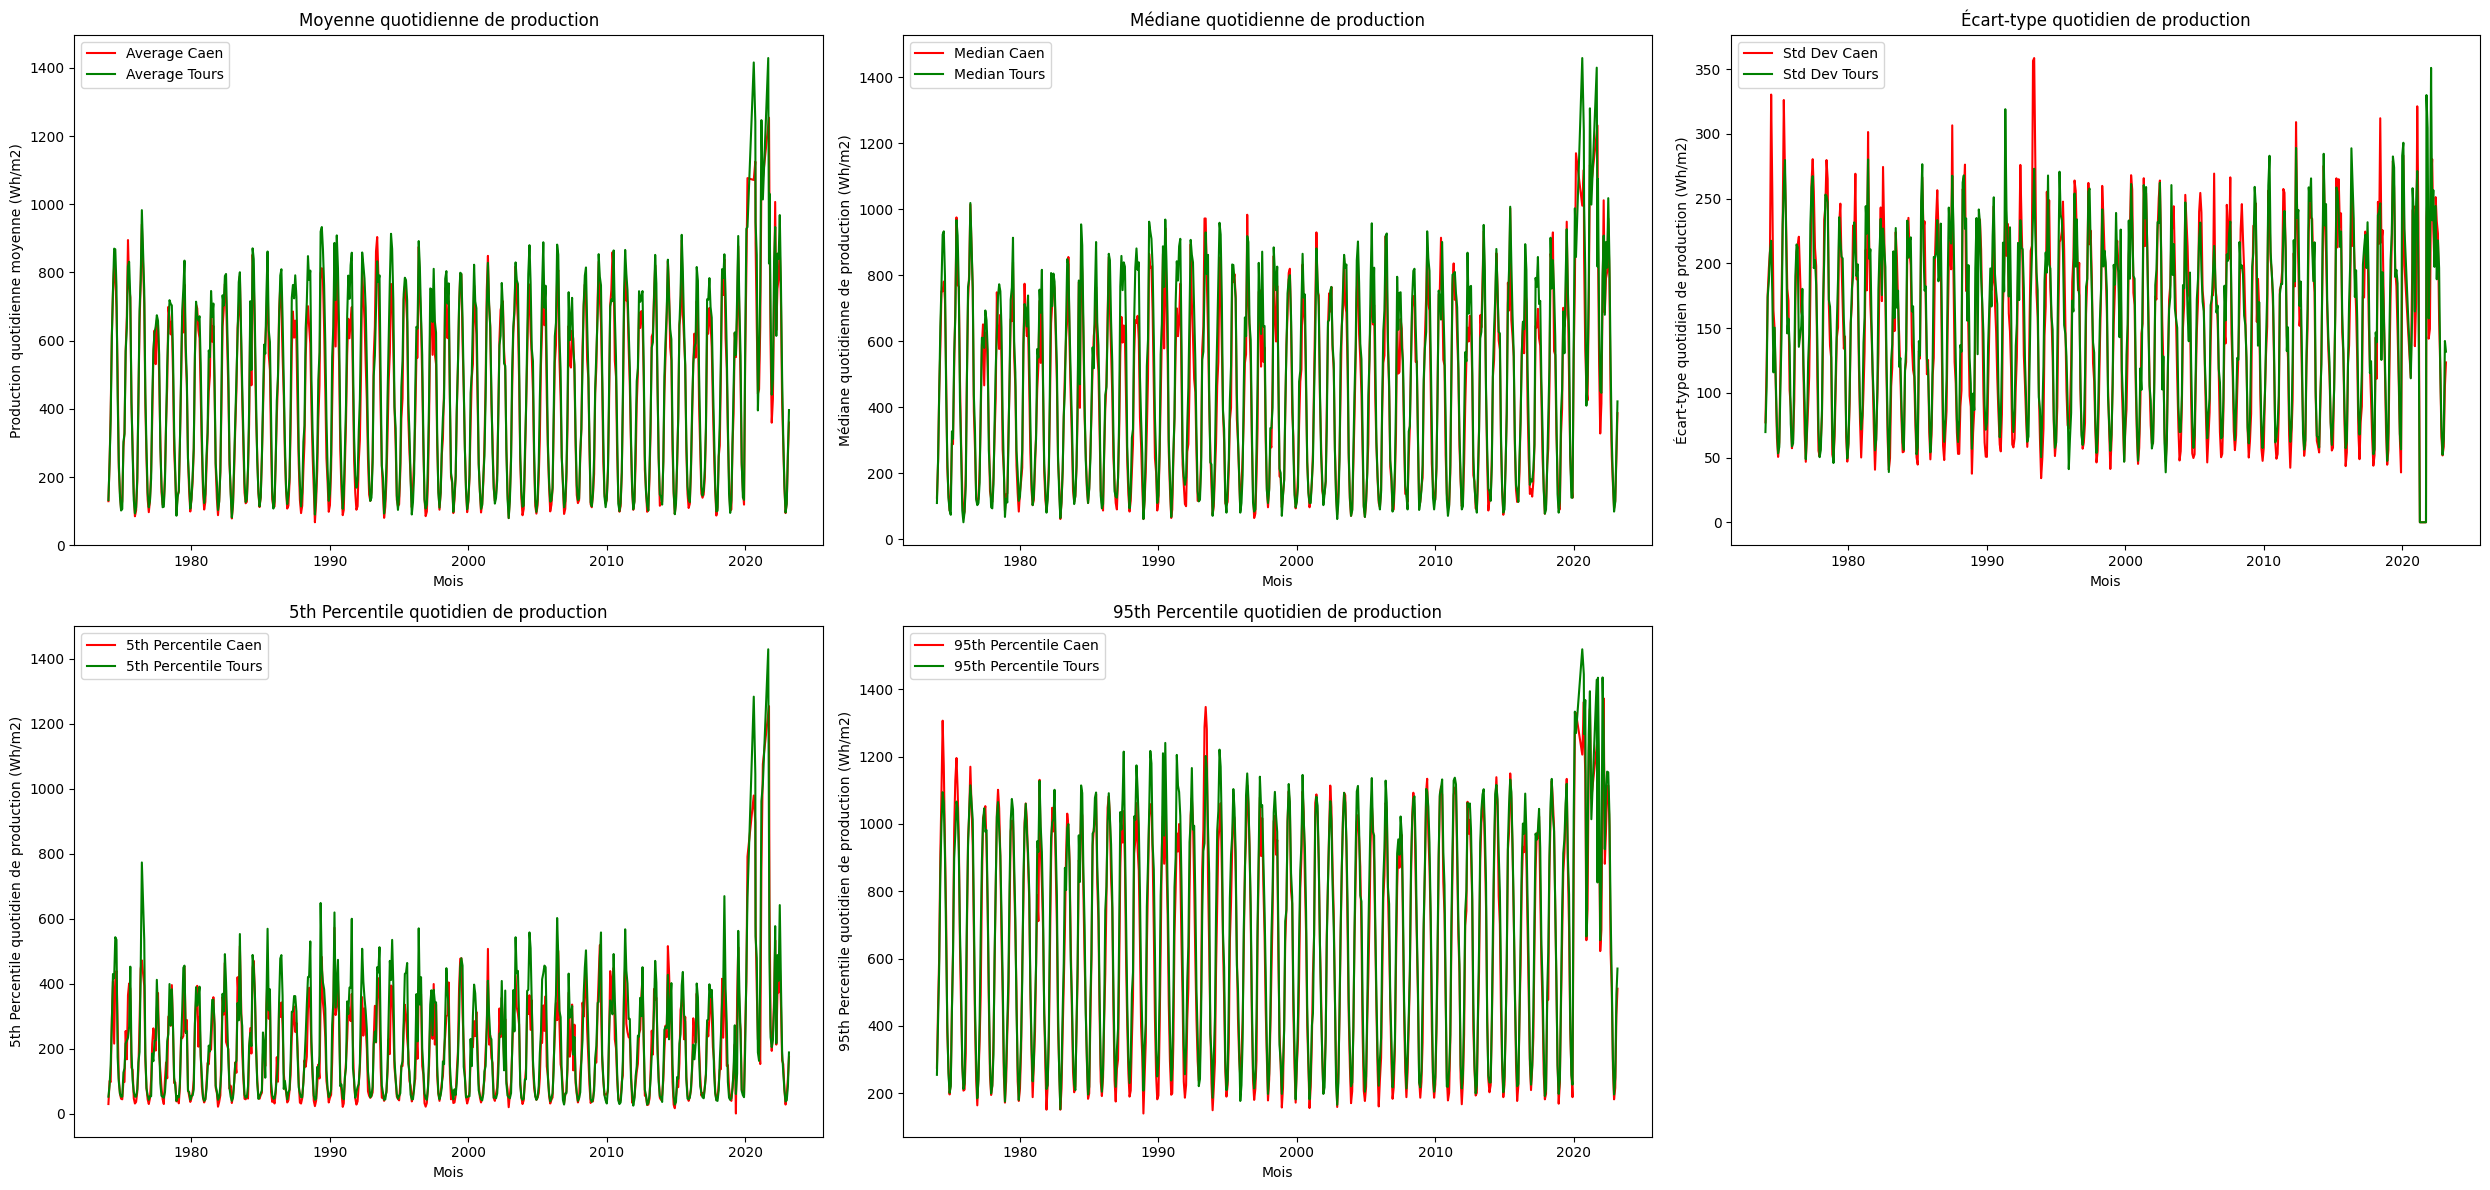

In [3]:
### Visioner les données du tableau de manières graphique

# Extrayez les données pour chaque métrique
dates = [entry[0] for entry in caen_canevas]
average_caen = [entry[1] for entry in caen_canevas]
median_caen = [entry[2] for entry in caen_canevas]
std_caen = [entry[3] for entry in caen_canevas]
percentile_5_caen = [entry[4] for entry in caen_canevas]
percentile_95_caen = [entry[5] for entry in caen_canevas]

average_tours = [entry[1] for entry in tours_canevas]
median_tours = [entry[2] for entry in tours_canevas]
std_tours = [entry[3] for entry in tours_canevas]
percentile_5_tours = [entry[4] for entry in tours_canevas]
percentile_95_tours = [entry[5] for entry in tours_canevas]

# Créez un subplot avec plusieurs axes (graphiques)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 12))

# Plot des moyennes quotidiennes
axes[0, 0].plot(dates, average_caen, 'r', label='Average Caen')
axes[0, 0].plot(dates, average_tours, 'g', label='Average Tours')
axes[0, 0].set_xlabel('Mois')
axes[0, 0].set_ylabel('Production quotidienne moyenne (Wh/m2)')
axes[0, 0].set_title('Moyenne quotidienne de production')
axes[0, 0].legend()

# Plot des médianes quotidiennes
axes[0, 1].plot(dates, median_caen, 'r', label='Median Caen')
axes[0, 1].plot(dates, median_tours, 'g', label='Median Tours')
axes[0, 1].set_xlabel('Mois')
axes[0, 1].set_ylabel('Médiane quotidienne de production (Wh/m2)')
axes[0, 1].set_title('Médiane quotidienne de production')
axes[0, 1].legend()

# Plot des écarts-types quotidiens
axes[0, 2].plot(dates, std_caen, 'r', label='Std Dev Caen')
axes[0, 2].plot(dates, std_tours, 'g', label='Std Dev Tours')
axes[0, 2].set_xlabel('Mois')
axes[0, 2].set_ylabel('Écart-type quotidien de production (Wh/m2)')
axes[0, 2].set_title('Écart-type quotidien de production')
axes[0, 2].legend()

# Plot des 5e percentiles quotidiens
axes[1, 0].plot(dates, percentile_5_caen, 'r', label='5th Percentile Caen')
axes[1, 0].plot(dates, percentile_5_tours, 'g', label='5th Percentile Tours')
axes[1, 0].set_xlabel('Mois')
axes[1, 0].set_ylabel('5th Percentile quotidien de production (Wh/m2)')
axes[1, 0].set_title('5th Percentile quotidien de production')
axes[1, 0].legend()

# Plot des 95e percentiles quotidiens
axes[1, 1].plot(dates, percentile_95_caen, 'r', label='95th Percentile Caen')
axes[1, 1].plot(dates, percentile_95_tours, 'g', label='95th Percentile Tours')
axes[1, 1].set_xlabel('Mois')
axes[1, 1].set_ylabel('95th Percentile quotidien de production (Wh/m2)')
axes[1, 1].set_title('95th Percentile quotidien de production')
axes[1, 1].legend()

fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

---
## 2. Fit of distributions and hypothesis tests

---
2.1. We focus on the daily production of electricity in April. Retrieve the data for month of April, in Caen and Tours. 

 1) Fit Gamma and normal distributions by log-likelihood maximization to 
    daily production of electricity during April (Caen & Tours).
    
 2) Compute the 4 log-likelihoods and select the best model for each location (justify your answer).
 
 3) Compare on the same plot the empirical, the  gamma and normal pdf (the
    empirical pdf is an histogram of frequencies).
    
 4) Why is there 3 parameters in python for the Gamma pdf whereas there
    is only 2 in the distribution seen during lectures? 

Remark : set floc to -0.001 for the gamma.fit (to avoid troubles in case of null observations)


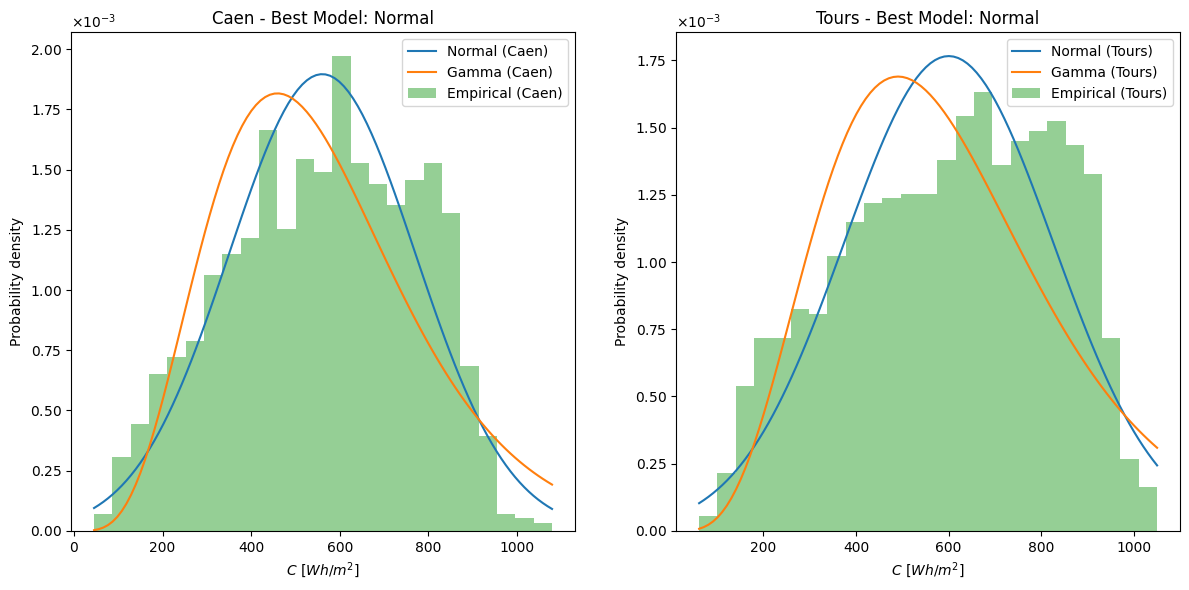

RMSE (Normal, Caen): 3.81e-04
RMSE (Gamma, Caen): 4.51e-04
RMSE (Normal, Tours): 3.83e-04
RMSE (Gamma, Tours): 4.60e-04
Log-Vraisemblance (Normal, Caen): -9549.38685406591
Log-Vraisemblance (Gamma, Caen): -9635.883766471161
Log-Vraisemblance (Normal, Tours): -9649.520623487704
Log-Vraisemblance (Gamma, Tours): -9737.796865103606


In [4]:
import scipy.stats as stats

# fit gamma et normal
gamma_params_caen = stats.gamma.fit(april_caen, floc=-0.001)
gamma_params_tours = stats.gamma.fit(april_tours, floc=-0.001)
normal_params_caen = stats.norm.fit(april_caen)
normal_params_tours = stats.norm.fit(april_tours)


# log-vraisemblances et sélection du meilleur modele
log_likelihood_gamma_caen = sum(stats.gamma.logpdf(april_caen, *gamma_params_caen))
log_likelihood_gamma_tours = sum(stats.gamma.logpdf(april_tours, *gamma_params_tours))
log_likelihood_normal_caen = sum(stats.norm.logpdf(april_caen, *normal_params_caen))
log_likelihood_normal_tours = sum(stats.norm.logpdf(april_tours, *normal_params_tours))


best_model_caen = "Gamma" if log_likelihood_gamma_caen > log_likelihood_normal_caen else "Normal"
best_model_tours = "Gamma" if log_likelihood_gamma_tours > log_likelihood_normal_tours else "Normal"

# graphs
plt.figure(figsize=(12, 6))

x_min_caen = min(april_caen)
x_max_caen = max(april_caen)
x_min_tours = min(april_tours)
x_max_tours = max(april_tours)

x_caen = linspace(x_min_caen, x_max_caen, 100)
x_tours = linspace(x_min_tours, x_max_tours, 100)

# Graphique Caen
plt.subplot(1, 2, 1)
pdf_norm_caen = stats.norm.pdf(x_caen, *normal_params_caen)
pdf_gamma_caen = stats.gamma.pdf(x_caen, *gamma_params_caen)
plt.plot(x_caen, pdf_norm_caen, label=f"Normal (Caen)")
plt.plot(x_caen, pdf_gamma_caen, label=f"Gamma (Caen)")
plt.hist(april_caen, bins=25, density=True, alpha=0.5, label="Empirical (Caen)")
plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.title(f"Caen - Best Model: {best_model_caen}")

plt.xlabel("$C$ $[Wh/m^2]$")
plt.ylabel("Probability density")

# Graphique Tours
plt.subplot(1, 2, 2)
pdf_norm_tours = stats.norm.pdf(x_tours, *normal_params_tours)
pdf_gamma_tours = stats.gamma.pdf(x_tours, *gamma_params_tours)
plt.plot(x_tours, pdf_norm_tours, label=f"Normal (Tours)")
plt.plot(x_tours, pdf_gamma_tours, label=f"Gamma (Tours)")
plt.hist(april_tours, bins=25, density=True, alpha=0.5, label="Empirical (Tours)")
plt.legend()
plt.title(f"Tours - Best Model: {best_model_tours}")
plt.xlabel("$C$ $[Wh/m^2]$")
plt.ylabel("Probability density")
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.show()

# RMSE
hist_caen, bins_caen = histogram(april_caen, bins=100, density=True)
rmse_norm_caen = sqrt(mean((pdf_norm_caen - hist_caen)**2))
rmse_gamma_caen = sqrt(mean((pdf_gamma_caen - hist_caen)**2))

hist_tours, bins_tours = histogram(april_tours, bins=100, density=True)
rmse_norm_tours = sqrt(mean((pdf_norm_tours - hist_tours)**2))
rmse_gamma_tours = sqrt(mean((pdf_gamma_tours - hist_tours)**2))

print("RMSE (Normal, Caen):", "{:.2e}".format(rmse_norm_caen))
print("RMSE (Gamma, Caen):", "{:.2e}".format(rmse_gamma_caen))
print("RMSE (Normal, Tours):", "{:.2e}".format(rmse_norm_tours))
print("RMSE (Gamma, Tours):", "{:.2e}".format(rmse_gamma_tours))

print("Log-Vraisemblance (Normal, Caen):", log_likelihood_normal_caen)
print("Log-Vraisemblance (Gamma, Caen):", log_likelihood_gamma_caen)
print("Log-Vraisemblance (Normal, Tours):", log_likelihood_normal_tours)
print("Log-Vraisemblance (Gamma, Tours):", log_likelihood_gamma_tours)


### Justification 2.1.2

La distribution gamma est la meilleure distribution lorsque les données sont disposées de manière asymétrique et ont tendance à être repoussées vers la gauche et à devenir plus rares et étalées lorsque leur valeur augmente. Au contraire, la distribution normale est la plus appropriée lorsque les données sont réparties de manière relativement symétrique autour de la moyenne et que la distribution suit une forme de cloche.

Dans mon code, afin de déterminer quelle distribution est la plus pertinente pour chaque ville, je calcule numériquement la log-vraisemblance et je choisis, pour chaque ville, la distribution ayant une log-vraisemblance la plus proche de zéro.

Dans les deux villes, la meilleure des distributions est la distribution normale. Cependant, je précise que si on ne fixe pas loc à -0.001, notre distribution gamma est plus adaptée et ressemble à notre distribution normale tout en restant moins précise.

Afin de vérifier mes résultats, je calcule l'erreur quadratique moyenne entre mon histogramme et mes distributions pour 100 données.

### Réponse 2.1.4

En cours, nous avions vu la loi de la distribution gamma comme dépendante de deux paramètres : alpha et bêta, où alpha détermine la courbure de la distribution et bêta l'échelle. En Python, on a trois paramètres dans `gamma.pdf(x, a, loc, scale)`. Les paramètres `a` et `scale` représentent respectivement alpha et bêta, et il existe un troisième paramètre, `loc`, qui est facultatif mais permet de décaler la distribution sur l'axe des x.


---

2.2. Check if the average daily production in April is the same in Caen and Tours. Let us recall that the null hypothesis is

$H_0$: $\mu_{Caen} = \mu_{Tours}$.

Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?

In [5]:
#code here


---
2.3. Test the equality of variance of daily production in April at Caen & Tours?
$H_0$: $\sigma_{Caen}=\sigma_{Tours}$.


In [6]:
#code here


---
2.4. Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

---
2.5. Apply the Wilcoxon test to distributions of daily productions in April, at Caen and Tours.  What can you conclude about the means of daily production in these 2 cities?


In [7]:
#code here


---
## 3. Regression and forecasting 

---
3.1. Do we observe any trend in the yearly solar production of electricity over the considered period?
To answer this question: 

a. You will compute the average daily production (Wh/m2) during April from 1977 up to 2019 (included).

b. You get a time-series of 44 values for each city. Regress these values on the explanatory
variables X=(Year-1977). Don't forget to add a constant term and analyze results. 

c. Plot on the same graph, the predicted and the observed values.

d. Comment your results! 


In [8]:
#code here


---
3.2. You want to design a model to forecast the solar electric production for the next day (location Caen only). You will work with data over the period 1977 to 2019. 

Let us denote by C(t) the production on day 't'. The model that we want to fit is called autoregressive and is defined as follows:

$$C(t) = \sum_{k=1}^{10} a_k C(t-k) $$

This model is common in time-series analysis and predicts the production of the next day with the  recent observations.

a. Split the dataset into a training set (1977 to 2010 included) and a validation set (2011 to 2019 included).

b.	Estimate this model with statsmodels on the training set. 

c.	How would you judge the quality of the predictive model? (Analyze statistics reported by statsmodel)

d.	Compute the Mean Absolute Error (MAE) between predicted and real consumptions (on the training set).

In [9]:
#code here


---
3.3. Use this model on the test set to forecast the electric daily production.

a. Compare on a graph, the forecast to  real consumptions on the given period. 

b. Plot the errors of prediction. Are they acceptable?

c. Compute the MAE on the test set and the $R^2$. Is the forecast reliable?

In [10]:
# code here
